<h1>Health Insurance and Hours Worked by Wives</h1>
<h4>Name: <u> Srinivas Rao Kolla </u></h4>
<br>
Health Insurance and Hours Worked By Wives
Description
a cross-section from 1993

number of observations : 22272

observation : individuals

country : United States

Usage
data(HI)
Format
A dataframe containing :

whrswk
hours worked per week by wife

hhi
wife covered by husband's HI ?

whi
wife has HI thru her job ?

hhi2
husband has HI thru own job ?

education
a factor with levels, "<9years", "9-11years", "12years", "13-15years", "16years", ">16years"

race
one of white, black, other

hispanic
hispanic ?

experience
years of potential work experience

kidslt6
number of kids under age of 6

kids618
number of kids 6–18 years old

husby
husband's income in thousands of dollars

region
one of other, northcentral, south, west

wght
sampling weight

Source
Olson, Craig A. (1998) “A comparison of parametric and semiparametric estimates of the effect of spousal healpth insurance coverage on weekly hours worked by wiwes”, Journal of Applied Econometrics, 13(5), september–october, 543–565.

References
Journal of Applied Econometrics data archive : http://jae.wiley.com/jae/.


<br><br>
Logistic Regression is another predictive analysis technique borrowed by machine learning from the field of statistics
<br><br>
It is the go-to method for binary classification problems(problems with two class values); method is used for analyzing datasets with one or more independent variables that determine an outcome.
<br><br>
The outcome is measured with a variable where there are only two possible outcomes; in logistic regression, the dependent variable is binary or can only contain data coded as 1(true, success, positive, etc.) or 0(false,failure,negative,etc.)
<br><br>
Logistic regression is a statistical method for analyzing a dataset in which there are one or more independent variables that determine an outcome.
<br><br>
The outcome is measured with a dichtomous variable(in which there are only two possible outcomes).
<br><br>
In Logistic Regression, the dependent variable is binary or dichotomous, i.e. it only contains data coded as 1(TRUE, success, positive, etc.) or 0(FALSE,failure,negative,etc.). regression model fit.
<br><br>
<h5> Machine Learning: K Nearest Neighbours </h5>

The K-nearest neighbors algorithm is among the simplest of all machine learning algorithms.

An object is classified by a majority vote of its neighbors with the object being assigned to the class most common among its K nearest neighbors.

K is a positive integer, typically small: k = 3,5, or 10.

KNN can do multiple(more than two) class prediction.

In binary(two-class) classification problems. It is helpful to choose k to be an odd number as this can avoid a tie vote


In [1]:
#Import Python Libraries: Numpy and Pandas
import pandas as pd
import numpy as np
#Import Libraries and Modules for data visualization
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
#Import scikit-learn models
#Naves Bayes 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
#Import scikit-learn module to split the dataset into train/test sub-datasets.
from sklearn.model_selection import train_test_split
#import scikit-learn module for K-fold cross-validation - algorithm/model evaluation and validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
#Import scikit-Learn module classification report to later use for information about how thesystem try to classify/lable each record.
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

In [2]:
filename = '/content/Health_Insurance_and_Hours_Worked_By_Wives.csv'
df = pd.read_csv(filename)

In [3]:
df.head()
#To print out the first 5 records in a data set.

,id,whrswk,hhi,whi,hhi2,education,race,hispanic,experience,kidslt6,kids618,husby,region,wght
0,1,0,no,no,no,13-15years,white,no,13.0,2,1,11.960,northcentral,214986
1,2,50,no,yes,no,13-15years,white,no,24.0,0,1,1.200,northcentral,210119
2,3,40,yes,no,yes,12years,white,no,43.0,0,0,31.275,northcentral,219955
3,4,40,no,yes,yes,13-15years,white,no,17.0,0,1,9.000,northcentral,210317
4,5,0,yes,no,yes,9-11years,white,no,44.5,0,0,0.000,northcentral,219955


In [4]:
df.isnull().sum()
#In order to find the number of Null values in each variable of data set.

id            0
whrswk        0
hhi           0
whi           0
hhi2          0
education     0
race          0
hispanic      0
experience    0
kidslt6       0
kids618       0
husby         0
region        0
wght          0
dtype: int64

In [5]:
print(df.education.unique())

['13-15years' '12years' '9-11years' '16years' '>16years' '<9years']


In order to remove the string values and convert the Education column into scale format, I am taking the mean values and replacing the range values.
<p>mean value of 13 and 15 is 14 </p>
<p>mean value of 9 and 11 is 10.</p>
<p>For >16 years we will take 17 </p>
<p>For < 9 years we will be taking 8 </p> 


In [6]:
df['education'] = df['education'].replace(['13-15years','12years','9-11years','16years','>16years','<9years'],[14,12,10,16,17,8])

In [7]:
# find all unique values in columns: 'hhi','whi','hhi2','race','hispanic','region'
print('hhi -',df.hhi.unique()) 
print('whi -',df.whi.unique())
print('hhi2 -',df.hhi2.unique())
print('race -',df.race.unique())
print('hispanic -',df.hispanic.unique())
print('region -',df.region.unique())

hhi - ['no' 'yes']
whi - ['no' 'yes']
hhi2 - ['no' 'yes']
race - ['white' 'black' 'other']
hispanic - ['no' 'yes']
region - ['northcentral' 'other' 'south' 'west']


In [8]:
#Replace all string values to perform one hot encoding
df['hhi'] = df['hhi'].replace(['no','yes'],[0,1])
df['whi'] = df['whi'].replace(['no','yes'],[0,1])
df['hhi2'] = df['hhi2'].replace(['no','yes'],[0,1])
df['race'] = df['race'].replace(['white','black','other'],[0,1,2])
df['hispanic'] = df['hispanic'].replace(['no','yes'],[0,1])
df['region'] = df['region'].replace(['northcentral','other','south','west'],[0,1,2,3])

In [9]:
df.head()

,id,whrswk,hhi,whi,hhi2,education,race,hispanic,experience,kidslt6,kids618,husby,region,wght
0,1,0,0,0,0,14,0,0,13.0,2,1,11.960,0,214986
1,2,50,0,1,0,14,0,0,24.0,0,1,1.200,0,210119
2,3,40,1,0,1,12,0,0,43.0,0,0,31.275,0,219955
3,4,40,0,1,1,14,0,0,17.0,0,1,9.000,0,210317
4,5,0,1,0,1,10,0,0,44.5,0,0,0.000,0,219955


In [10]:
# round all values in columns 'husby' and 'experience' and convert them to Integer data type
df['husby'] = [ int (np.round(i,0)) for i in df['husby']] 
df['experience'] = [ int (np.round(i,0)) for i in df['experience']]

In [11]:
df.head()

,id,whrswk,hhi,whi,hhi2,education,race,hispanic,experience,kidslt6,kids618,husby,region,wght
0,1,0,0,0,0,14,0,0,13,2,1,12,0,214986
1,2,50,0,1,0,14,0,0,24,0,1,1,0,210119
2,3,40,1,0,1,12,0,0,43,0,0,31,0,219955
3,4,40,0,1,1,14,0,0,17,0,1,9,0,210317
4,5,0,1,0,1,10,0,0,44,0,0,0,0,219955


In [12]:
#return the summary statistics of numeric variables
df.describe()

,id,whrswk,hhi,whi,hhi2,education,race,hispanic,experience,kidslt6,kids618,husby,region,wght
count,22272.000000,22272.000000,22272.000000,22272.000000,22272.000000,22272.000000,22272.000000,22272.000000,22272.000000,22272.000000,22272.000000,22272.000000,22272.000000,2.227200e+04
mean,11136.500000,25.566810,0.496273,0.373159,0.609555,13.106232,0.071076,0.075027,22.943831,0.349407,0.691002,27.097432,1.491783,1.633722e+05
std,6429.516934,18.710647,0.499997,0.483655,0.487861,2.247461,0.285278,0.263441,11.638202,0.662840,0.986494,23.563629,1.084928,9.066769e+04
min,1.000000,0.000000,0.000000,0.000000,0.000000,8.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,5.182000e+03
25%,5568.750000,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,14.000000,0.000000,0.000000,8.000000,1.000000,9.913625e+04
50%,11136.500000,35.000000,0.000000,0.000000,1.000000,12.000000,0.000000,0.000000,21.000000,0.000000,0.000000,25.000000,2.000000,1.548145e+05
75%,16704.250000,40.000000,1.000000,1.000000,1.000000,14.000000,0.000000,0.000000,31.000000,1.000000,1.000000,40.000000,2.000000,2.040132e+05
max,22272.000000,90.000000,1.000000,1.000000,1.000000,17.000000,2.000000,1.000000,51.000000,5.000000,8.000000,184.000000,3.000000,1.136869e+06


In [13]:
# to find number of records in each class target attribute.
print(df.groupby('hhi').size())

hhi
0    11219
1    11053
dtype: int64


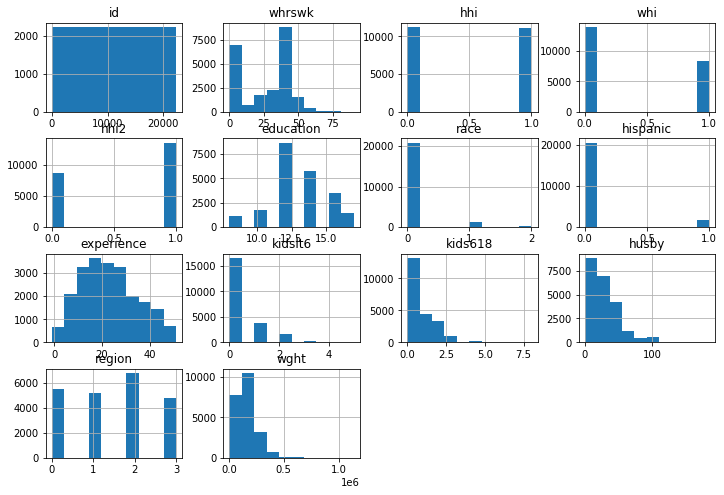

In [14]:
#plot histogram of each numeric variable in the data set.
df.hist(figsize=(12,8))
pyplot.show()

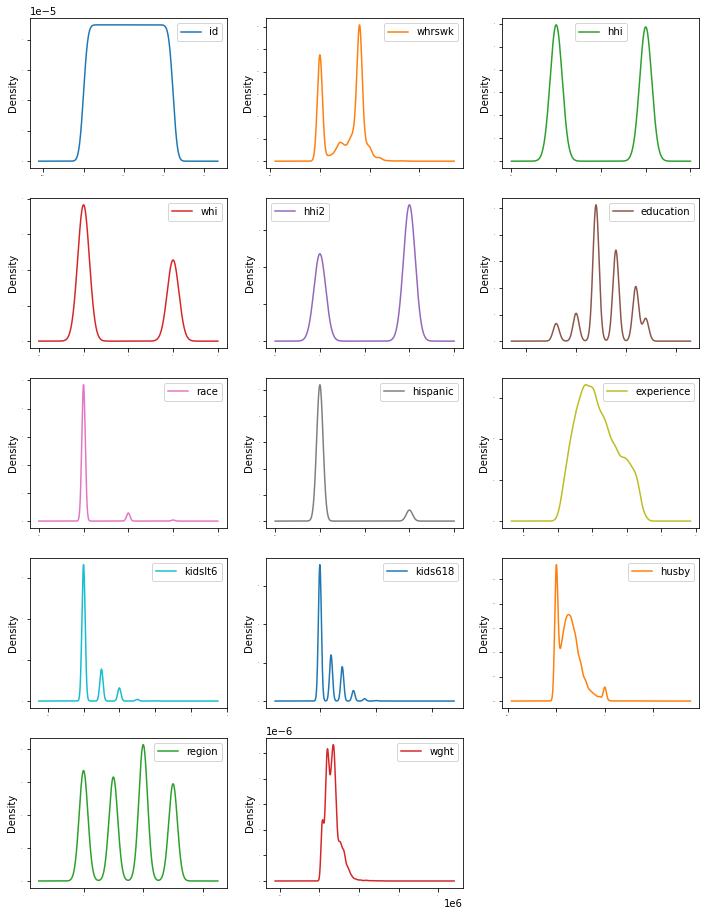

In [15]:
#generate density plot for each numeric variable.
df.plot(kind = 'density', subplots = True, layout= (5,3), sharex = False, legend = True, fontsize = 1, figsize = (12,16))
pyplot.show()

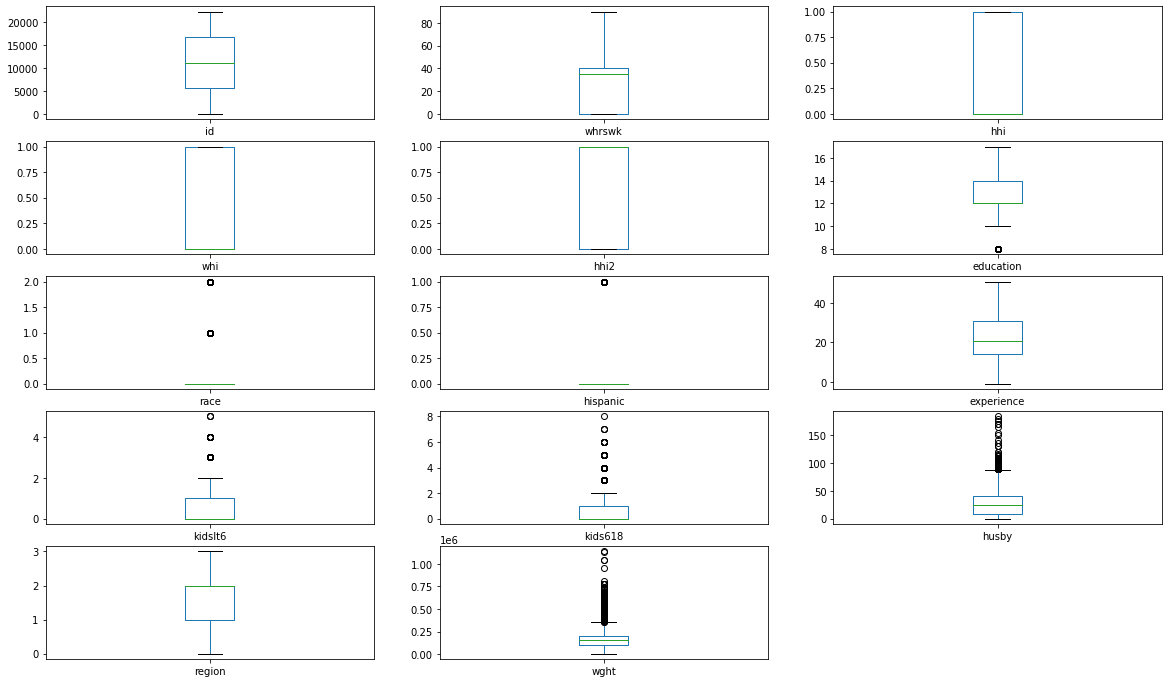

In [16]:
#generate box plots for each numeric variable
df.plot(kind = 'box', subplots = True, layout = (5,3), sharex = False, figsize = (20,12))
pyplot.show()

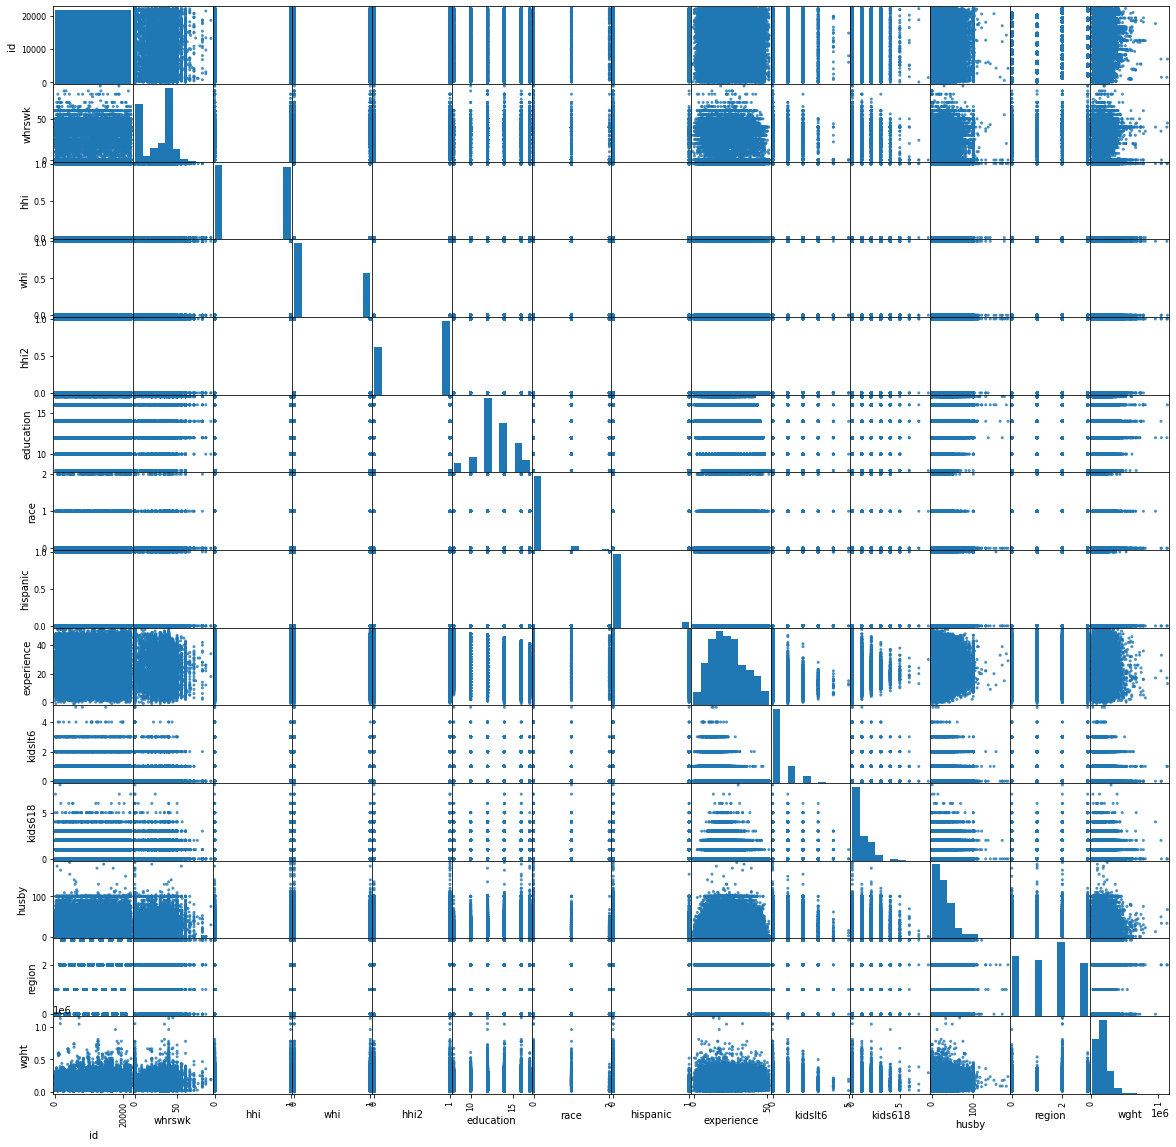

In [17]:
# generate scatter plot matrix of each variable
scatter_matrix(df,alpha= 0.8, figsize = (20,20))
pyplot.show()

<h3> Separate Dataset into Input and Output Numpy arrays.</h3>
<br> <br>
Why do we separate the whole data into 2 arrays(we will later split the data into train and score)?
<br><br>
- Training dataset(X) consist of the independent variables or predictors<br<br>
- Desired Output(Y) consist of the dependent variable or that which we are trying to predict<br><br>
<h5>Separate Dataset into Input and Output Numpy Arrays</h5>

In [18]:
#store dataframe values into a numpy array.
array = df.values
# seperate data set into input and output by slicing
# for X(input) [:,1:9] all the rows from 1 to 9
# these are independent variables or predictors
X = df[['whrswk','education','experience','kidslt6','kids618','husby','region']]
#for Y(input) [: ,9], all the rows in column 9
# these are the values we are trying to predict.
Y = df[['hhi']]

In [19]:
X

,whrswk,education,experience,kidslt6,kids618,husby,region
0,0,14,13,2,1,12,0
1,50,14,24,0,1,1,0
2,40,12,43,0,0,31,0
3,40,14,17,0,1,9,0
4,0,10,44,0,0,0,0
...,...,...,...,...,...,...,...
22267,0,10,46,0,0,0,2
22268,0,12,29,0,0,100,2
22269,40,14,12,0,0,31,2
22270,40,12,17,0,2,33,2


In [20]:
  Y

,hhi
0,0
1,0
2,1
3,0
4,1
...,...
22267,0
22268,1
22269,1
22270,0


In [21]:
# split the data set into test 33% and training data set for 67%
test_size = 0.33
# selection of data must be done randomly
seed = 7
#split the dataset into train and test data sets.
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = test_size, random_state = seed) 

In [22]:
#Build the model
model = LogisticRegression(random_state = seed)
#train the model using training data
model.fit(X_train, Y_train)
#print the classification report
predicted = model.predict(X_test)
report = classification_report(Y_test, predicted)
print('Classification Report:', '\n', report)

Classification Report: 
               precision    recall  f1-score   support

           0       0.67      0.75      0.71      3684
           1       0.72      0.63      0.67      3666

    accuracy                           0.69      7350
   macro avg       0.70      0.69      0.69      7350
weighted avg       0.70      0.69      0.69      7350



Notes: classification report - precision, recall, F1-score and support
<br>
The precision is the ratio tp/(tp+fp)
<br>
-> where tp is the number of true positives and fp the number of false positives
<br>
The precision represents the ability of the classifier not to label a positive sampleas negative
<br>
<br>
The recall is the ratio tp/(tp+fn)
<br>
-> Where tp is the number of true positives and fn the number of false negatives
<br>
The recall represents the ability of the classifier to find all the positive samples
<br>
<br>
The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall
<br>
-> where an F-beta score reaches its best value at 1 and worst score at 0.
<br>
The F-beta score weights recall more than precision by a factor of beta.
<br>
beta == 1.0 means recall and precision are equally important.
<br>
The support is the number of occurences of each class in y_true.
<br>
<br>
<h3>Score the accuracy of the model</h3>

In [23]:
#Score the accuracy value
result = model.score(X_test, Y_test)
#print out the results
print(('Accuracy: %.3f%%')%(result*100.0))

Accuracy: 69.238%


In [24]:
#evaluate the algorithm
#specify the number of time of repeated splitting, in this case 10 folds
n_splits = 10
#fix the random seed
#must use the same seed value so that the same sub sets can be obtained
#for each time the process is repeated.
seed = 7
#split the whole data set into folds.
"""In K-fold cross validation, the original sample is randomly partitioned into k equal sized sub samples.Of the k 
subsamples a single sub sample is retained as the validation data for the testing of the model, and the remaining 
k-1 sub samples are used as training data, the cross validation is then repeated k times,with each of the k sub 
samples used exactly once as validation data, the k results can then be averaged to produce a single estimation. The
advantage of this method over repeated random sub-sampling is that all observations are used for both training and
validation, and each observation is used for validation exactly once."""
kfold = KFold(n_splits, random_state = seed,shuffle=True)
#for Logistic regression, we use accuracy level to evaluate model/algorithm
scoring = 'accuracy'
#train the model and run the K fold cross validation to evaluate the model
results = cross_val_score(model, X,Y, cv = kfold, scoring = scoring)
#print the evaluation results
#result: the average of all the results obtained from the K fold cross validation
print('Accuracy: %.3f (%.3f)'% (results.mean(), results.std()))

Accuracy: 0.699 (0.010)


In [25]:
#build the model
model_knn = KNeighborsClassifier()
#train the the model using the training sub-dataset
model_knn.fit(X_train,Y_train)
#print the classification report
predicted = model_knn.predict(X_test)
report = classification_report(Y_test,predicted)
print(report)

              precision    recall  f1-score   support

           0       0.68      0.67      0.67      3684
           1       0.67      0.68      0.67      3666

    accuracy                           0.67      7350
   macro avg       0.67      0.67      0.67      7350
weighted avg       0.67      0.67      0.67      7350



In [26]:
#score the accuracy level
result = model_knn.score(X_test,Y_test)
#print out the results
print(("Accuracy: %.3f%%")%(result*100.0))

Accuracy: 67.401%



<br>
<h3>Evaluate/Validate Algorithm/Model - using K-Fold Cross-Validation</h3>
<br><br>
<p>#specify the number of times of repeated splitting, Fix the random seed, you must use the same seed value so that the same subset can be obtained for each time the process is repeated, Splitting the whole data set into folds, for logistic regression, we can use accuracy level to evaluate the model/algorithm, train the model and run k-fold cross-validation to validate the model, Print out the evaluation results.</p>

In [27]:
#evaluate the algorithm
#specify the number of time of repeated splitting, in this case 10 folds
n_splits = 10
#fix the random seed
#must use the same seed value so that the same sub sets can be obtained
#for each time the process is repeated.
seed = 7
#split the whole data set into folds.
"""In K-fold cross validation, the original sample is randomly partitioned into k equal sized sub samples.Of the k 
subsamples a single sub sample is retained as the validation data for the testing of the model, and the remaining 
k-1 sub samples are used as training data, the cross validation is then repeated k times,with each of the k sub 
samples used exactly once as validation data, the k results can then be averaged to produce a single estimation. The
advantage of this method over repeated random sub-sampling is that all observations are used for both training and
validation, and each observation is used for validation exactly once."""
kfold = KFold(n_splits, random_state = seed,shuffle=True)
#for KNN Classifier, we use accuracy level to evaluate model/algorithm
scoring = 'accuracy'
#train the model and run the K fold cross validation to evaluate the model
results = cross_val_score(model_knn, X,Y, cv = kfold, scoring = scoring)
#print the evaluation results
#result: the average of all the results obtained from the K fold cross validation
print('Accuracy: %.3f (%.3f)'% (results.mean(), results.std()))

Accuracy: 0.672 (0.010)
